In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_image,train_labels),(test_image,test_label)=keras.datasets.mnist.load_data()

In [3]:
type(train_image)

numpy.ndarray

In [4]:
data=[]
j=0
for i in range(len(train_labels)):
    if train_labels[i]==9:
        data.append(train_image[i])
        j+=1
    if j==500:
        break

In [5]:
len(data)

100

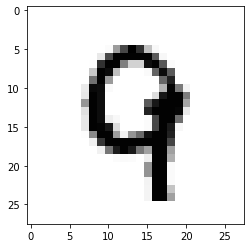

In [6]:
plt.imshow(data[35].reshape(28,28),cmap='Greys')

In [7]:
data=np.array(data,np.float32)

In [8]:
data=data.reshape(-1,28,28,1)

In [9]:
data=(data-127.5)/127.5

In [10]:
BATCH_SIZE=50
BUFFER_SIZE=data.shape[0]
train_dataset=tf.data.Dataset.from_tensor_slices(data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [11]:
Conv2D=tf.keras.layers.Conv2D
Dense=tf.keras.layers.Dense
Flatten=tf.keras.layers.Flatten()
LeakyRelu=tf.keras.layers.LeakyReLU()
norm=tf.keras.layers.BatchNormalization()
reshape=tf.keras.layers.Reshape
ConTrans=tf.keras.layers.Conv2DTranspose

# Discriminator

In [12]:
def get_discriminator():
    model=tf.keras.models.Sequential()
    model.add(Conv2D(7,(3,3),padding='same',input_shape=(28,28,1)))
    model.add(Flatten)
    model.add(LeakyRelu)
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    return model
    

In [13]:
model_discriminator=get_discriminator()

In [14]:
discriminator_optimizer=tf.optimizers.Adam(0.001)

In [15]:
def loss_discriminator(real_detection,fake_detection):
    real_detection=tf.sigmoid(real_detection)
    fake_detection=tf.sigmoid(fake_detection)
    
    real_loss=tf.losses.binary_crossentropy(np.ones_like(real_detection),real_detection)
    fake_loss=tf.losses.binary_crossentropy(np.zeros_like(fake_detection),fake_detection)
    return real_loss+fake_loss

# Generator

In [16]:
def get_generator():
    model=tf.keras.models.Sequential()
    model.add(Dense(7*7*256,input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(reshape((7,7,256)))
    model.add(ConTrans(128,(3,3),padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(ConTrans(64,(3,3),strides=(2,2),padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(ConTrans(1,(3,3),strides=(2,2),padding='same'))
    
    return model

In [17]:
model_generator=get_generator()

In [18]:
generator_optimizer=tf.optimizers.Adam(0.001)

In [19]:
def loss_generator(fake_prediction):
    fake_prediction=tf.sigmoid(fake_prediction)
    fake_loss=tf.losses.binary_crossentropy(np.ones_like(fake_prediction),fake_prediction)
    return fake_loss

# Training

In [20]:
def train(dataset,epochs):
    for _ in range(epochs):
        for image in dataset:
            
            train_set(image)

In [21]:
def train_set(image):
    new_image=[]
    fake_image_noise=np.random.randn(BATCH_SIZE,100).astype('float32')
    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:
        generated_img=model_generator(fake_image_noise)
        
        real_output=model_discriminator(image)
        fake_output=model_discriminator(generated_img)
        
        gen_loss=loss_generator(fake_output)
        dis_loss=loss_discriminator(real_output,fake_output)
        
        gradient_of_generator=gen_tape.gradient(gen_loss,model_generator.trainable_variables)
        gradient_of_discriminator=dis_tape.gradient(dis_loss,model_discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gradient_of_generator,model_generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradient_of_discriminator,model_discriminator.trainable_variables))
        
        new_image.append(generated_img)
        print('Loss gen:',np.mean(gen_loss))
        print('Loss disc:',np.mean(dis_loss))
        
        return new_image

In [22]:
pred=train(train_dataset,500)

Loss gen: 0.6778366
Loss disc: 1.0485172
Loss gen: 0.63208246
Loss disc: 0.763125
Loss gen: 0.62662476
Loss disc: 0.7722514
Loss gen: 0.5753093
Loss disc: 0.84349936
Loss gen: 0.5141785
Loss disc: 0.98123735
Loss gen: 0.50653774
Loss disc: 1.0361451
Loss gen: 0.44596708
Loss disc: 1.1902609
Loss gen: 0.4686219
Loss disc: 1.1937674
Loss gen: 0.52979547
Loss disc: 1.192768
Loss gen: 0.75512475
Loss disc: 0.7855901
Loss gen: 1.2603537
Loss disc: 0.48762113
Loss gen: 1.876865
Loss disc: 0.93588614
Loss gen: 1.5214827
Loss disc: 0.6312427
Loss gen: 0.8414135
Loss disc: 0.88638526
Loss gen: 0.679578
Loss disc: 1.074757
Loss gen: 0.54423547
Loss disc: 1.4288025
Loss gen: 0.45371166
Loss disc: 1.5030919
Loss gen: 0.39298055
Loss disc: 1.5312088
Loss gen: 0.7162193
Loss disc: 1.0542424
Loss gen: 0.6640972
Loss disc: 1.026922
Loss gen: 0.93205804
Loss disc: 0.82653916
Loss gen: 1.0460643
Loss disc: 0.6935966
Loss gen: 1.0939431
Loss disc: 0.5970167
Loss gen: 1.1899838
Loss disc: 0.54631853
Loss 

Loss gen: 15.424948
Loss disc: 0.00046053782
Loss gen: 15.424948
Loss disc: 0.0019707575
Loss gen: 15.424948
Loss disc: 0.0005271002
Loss gen: 15.424948
Loss disc: 0.0011780884
Loss gen: 15.424948
Loss disc: 0.0012728196
Loss gen: 15.424948
Loss disc: 0.0010297665
Loss gen: 15.424948
Loss disc: 0.0013806389
Loss gen: 15.424948
Loss disc: 0.0019099724
Loss gen: 15.424948
Loss disc: 0.00046984706
Loss gen: 15.424948
Loss disc: 0.0012163725
Loss gen: 15.424948
Loss disc: 0.0011204362
Loss gen: 15.424948
Loss disc: 0.0013246159
Loss gen: 15.424948
Loss disc: 0.000976589
Loss gen: 15.424948
Loss disc: 0.00047553115
Loss gen: 15.424948
Loss disc: 0.001784984
Loss gen: 15.424948
Loss disc: 0.0010226481
Loss gen: 15.424948
Loss disc: 0.001208493
Loss gen: 15.424948
Loss disc: 0.00053455867
Loss gen: 15.424948
Loss disc: 0.001660212
Loss gen: 15.424948
Loss disc: 0.0010701224
Loss gen: 15.424948
Loss disc: 0.0010969399
Loss gen: 15.424948
Loss disc: 0.0009990481
Loss gen: 15.424948
Loss disc: 0

Loss gen: 15.424948
Loss disc: 0.000450448
Loss gen: 15.424948
Loss disc: 0.00043147893
Loss gen: 15.424948
Loss disc: 0.0006971827
Loss gen: 15.424948
Loss disc: 0.00017866184
Loss gen: 15.424948
Loss disc: 0.00036165782
Loss gen: 15.424948
Loss disc: 0.0005055093
Loss gen: 15.424948
Loss disc: 0.00066316215
Loss gen: 15.424948
Loss disc: 0.00019834326
Loss gen: 15.424948
Loss disc: 0.00015996216
Loss gen: 15.424948
Loss disc: 0.0006925274
Loss gen: 15.424948
Loss disc: 0.00041269037
Loss gen: 15.424948
Loss disc: 0.00043415974
Loss gen: 15.424948
Loss disc: 0.00044582333
Loss gen: 15.424948
Loss disc: 0.00039445265
Loss gen: 15.424948
Loss disc: 0.0003269018
Loss gen: 15.424948
Loss disc: 0.0005062904
Loss gen: 15.424948
Loss disc: 0.00054148433
Loss gen: 15.424948
Loss disc: 0.0002860659
Loss gen: 15.424948
Loss disc: 0.0005076837
Loss gen: 15.424948
Loss disc: 0.00031308882
Loss gen: 15.424948
Loss disc: 0.00057636725
Loss gen: 15.424948
Loss disc: 0.000238387
Loss gen: 15.424948
L

Loss gen: 15.424948
Loss disc: 0.00018710166
Loss gen: 15.424948
Loss disc: 0.00029248517
Loss gen: 15.424948
Loss disc: 0.00010699366
Loss gen: 15.424948
Loss disc: 0.00036979918
Loss gen: 15.424948
Loss disc: 6.220456e-05
Loss gen: 15.424948
Loss disc: 0.00041198294
Loss gen: 15.424948
Loss disc: 0.0002955458
Loss gen: 15.424948
Loss disc: 0.0001767253
Loss gen: 15.424948
Loss disc: 0.00023626299
Loss gen: 15.424948
Loss disc: 0.00023326639
Loss gen: 15.424948
Loss disc: 0.000108728396
Loss gen: 15.424948
Loss disc: 0.00035793663
Loss gen: 15.424948
Loss disc: 0.00036710053
Loss gen: 15.424948
Loss disc: 9.784738e-05
Loss gen: 15.424948
Loss disc: 0.00024952376
Loss gen: 15.424948
Loss disc: 0.00021251809
Loss gen: 15.424948
Loss disc: 0.00030907852
Loss gen: 15.424948
Loss disc: 0.00015066078
Loss gen: 15.424948
Loss disc: 0.00037246966
Loss gen: 15.424948
Loss disc: 8.501419e-05
Loss gen: 15.424948
Loss disc: 0.00033029506
Loss gen: 15.424948
Loss disc: 0.00012459815
Loss gen: 15.4

Loss gen: 15.424948
Loss disc: 0.00018721119
Loss gen: 15.424948
Loss disc: 0.000127928
Loss gen: 15.424948
Loss disc: 0.00014551802
Loss gen: 15.424948
Loss disc: 0.00016833121
Loss gen: 15.424948
Loss disc: 9.9045756e-05
Loss gen: 15.424948
Loss disc: 0.00021353675
Loss gen: 15.424948
Loss disc: 0.00015509044
Loss gen: 15.424948
Loss disc: 0.00015646563
Loss gen: 15.424948
Loss disc: 0.00022113236
Loss gen: 15.424948
Loss disc: 8.9398905e-05
Loss gen: 15.424948
Loss disc: 0.00016079858
Loss gen: 15.424948
Loss disc: 0.00014844802
Loss gen: 15.424948
Loss disc: 0.00023690898
Loss gen: 15.424948
Loss disc: 7.1336326e-05
Loss gen: 15.424948
Loss disc: 0.00019053856
Loss gen: 15.424948
Loss disc: 0.000116468866
Loss gen: 15.424948
Loss disc: 0.00021862764
Loss gen: 15.424948
Loss disc: 8.7284025e-05
Loss gen: 15.424948
Loss disc: 0.00016509148
Loss gen: 15.424948
Loss disc: 0.00013959371
Loss gen: 15.424948
Loss disc: 0.00015149241
Loss gen: 15.424948
Loss disc: 0.00015204339
Loss gen: 1

Loss gen: 15.424948
Loss disc: 0.00016226526
Loss gen: 15.424948
Loss disc: 6.664588e-05
Loss gen: 15.424948
Loss disc: 5.394154e-05
Loss gen: 15.424948
Loss disc: 0.00017405114
Loss gen: 15.424948
Loss disc: 7.5018004e-05
Loss gen: 15.424948
Loss disc: 0.00015227971
Loss gen: 15.424948
Loss disc: 0.000118422024
Loss gen: 15.424948
Loss disc: 0.00010821063
Loss gen: 15.424948
Loss disc: 9.116659e-05
Loss gen: 15.424948
Loss disc: 0.00013471143
Loss gen: 15.424948
Loss disc: 7.1406655e-05
Loss gen: 15.424948
Loss disc: 0.00015372384
Loss gen: 15.424948
Loss disc: 8.404681e-05
Loss gen: 15.424948
Loss disc: 0.00014038994
Loss gen: 15.424948
Loss disc: 6.790483e-05
Loss gen: 15.424948
Loss disc: 0.00015579406
Loss gen: 15.424948
Loss disc: 0.00013313345
Loss gen: 15.424948
Loss disc: 8.995665e-05
Loss gen: 15.424948
Loss disc: 0.0001558005
Loss gen: 15.424948
Loss disc: 6.662207e-05
Loss gen: 15.424948
Loss disc: 0.00014248485
Loss gen: 15.424948
Loss disc: 7.919511e-05
Loss gen: 15.42494

Loss gen: 15.424948
Loss disc: 0.000101396305
Loss gen: 15.424948
Loss disc: 7.239254e-05
Loss gen: 15.424948
Loss disc: 7.106559e-05
Loss gen: 15.424948
Loss disc: 0.00010221122
Loss gen: 15.424948
Loss disc: 0.00013643135
Loss gen: 15.424948
Loss disc: 3.644453e-05
Loss gen: 15.424948
Loss disc: 9.0844456e-05
Loss gen: 15.424948
Loss disc: 8.1502694e-05
Loss gen: 15.424948
Loss disc: 0.00011452825
Loss gen: 15.424948
Loss disc: 5.7377314e-05
Loss gen: 15.424948
Loss disc: 3.834289e-05
Loss gen: 15.424948
Loss disc: 0.00013302434
Loss gen: 15.424948
Loss disc: 4.6163703e-05
Loss gen: 15.424948
Loss disc: 0.00012477505
Loss gen: 15.424948
Loss disc: 0.000117877724
Loss gen: 15.424948
Loss disc: 5.269238e-05
Loss gen: 15.424948
Loss disc: 3.8734375e-05
Loss gen: 15.424948
Loss disc: 0.00013126279
Loss gen: 15.424948
Loss disc: 3.8818533e-05
Loss gen: 15.424948
Loss disc: 0.00013074659
Loss gen: 15.424948
Loss disc: 2.6687105e-05
Loss gen: 15.424948
Loss disc: 0.00014240544
Loss gen: 15.

Loss gen: 15.424948
Loss disc: 8.917168e-05
Loss gen: 15.424948
Loss disc: 4.8087513e-05
Loss gen: 15.424948
Loss disc: 6.280932e-05
Loss gen: 15.424948
Loss disc: 7.408118e-05
Loss gen: 15.424948
Loss disc: 2.9747607e-05
Loss gen: 15.424948
Loss disc: 0.00010678489
Loss gen: 15.424948
Loss disc: 7.7256e-05
Loss gen: 15.424948
Loss disc: 5.900687e-05
Loss gen: 15.424948
Loss disc: 2.0081328e-05
Loss gen: 15.424948
Loss disc: 0.000115799725
Loss gen: 15.424948
Loss disc: 5.8155405e-05
Loss gen: 15.424948
Loss disc: 7.743935e-05
Loss gen: 15.424948
Loss disc: 5.5935016e-05
Loss gen: 15.424948
Loss disc: 7.9328005e-05
Loss gen: 15.424948
Loss disc: 8.996685e-05
Loss gen: 15.424948
Loss disc: 4.501584e-05
Loss gen: 15.424948
Loss disc: 3.7758917e-05
Loss gen: 15.424948
Loss disc: 9.682878e-05
Loss gen: 15.424948
Loss disc: 5.763921e-05
Loss gen: 15.424948
Loss disc: 7.664783e-05
Loss gen: 15.424948
Loss disc: 9.256133e-05
Loss gen: 15.424948
Loss disc: 4.143943e-05
Loss gen: 15.424948
Loss

Loss gen: 15.424948
Loss disc: 2.3108316e-05
Loss gen: 15.424948
Loss disc: 2.7501468e-05
Loss gen: 15.424948
Loss disc: 8.31841e-05
Loss gen: 15.424948
Loss disc: 5.038026e-05
Loss gen: 15.424948
Loss disc: 6.0079863e-05
Loss gen: 15.424948
Loss disc: 5.0840237e-05
Loss gen: 15.424948
Loss disc: 5.9383707e-05
Loss gen: 15.424948
Loss disc: 4.8033107e-05
Loss gen: 15.424948
Loss disc: 6.194389e-05
Loss gen: 15.424948
Loss disc: 6.4840744e-05
Loss gen: 15.424948
Loss disc: 4.4909626e-05
Loss gen: 15.424948
Loss disc: 6.072433e-05
Loss gen: 15.424948
Loss disc: 4.877311e-05
Loss gen: 15.424948
Loss disc: 2.3966662e-05
Loss gen: 15.424948
Loss disc: 8.525164e-05
Loss gen: 15.424948
Loss disc: 8.3767976e-05
Loss gen: 15.424948
Loss disc: 2.527619e-05
Loss gen: 15.424948
Loss disc: 5.3757765e-05
Loss gen: 15.424948
Loss disc: 5.500605e-05
Loss gen: 15.424948
Loss disc: 3.7698584e-05
Loss gen: 15.424948
Loss disc: 7.081949e-05
Loss gen: 15.424948
Loss disc: 6.29005e-05
Loss gen: 15.424948
Lo

Loss gen: 15.424948
Loss disc: 3.6623762e-05
Loss gen: 15.424948
Loss disc: 2.7366606e-05
Loss gen: 15.424948
Loss disc: 3.2253596e-05
Loss gen: 15.424948
Loss disc: 2.9580566e-05
Loss gen: 15.424948
Loss disc: 3.508264e-05
Loss gen: 15.424948
Loss disc: 2.4789844e-05
Loss gen: 15.424948
Loss disc: 3.525907e-05
Loss gen: 15.424948
Loss disc: 2.2700604e-05
Loss gen: 15.424948
Loss disc: 2.1393154e-05
Loss gen: 15.424948
Loss disc: 3.4508226e-05
Loss gen: 15.424948
Loss disc: 2.909457e-05
Loss gen: 15.424948
Loss disc: 2.5196969e-05
Loss gen: 15.424948
Loss disc: 2.6782329e-05
Loss gen: 15.424948
Loss disc: 2.5790836e-05
Loss gen: 15.424948
Loss disc: 1.6820144e-05
Loss gen: 15.424948
Loss disc: 3.3998847e-05
Loss gen: 15.424948
Loss disc: 1.6702103e-05
Loss gen: 15.424948
Loss disc: 3.2631095e-05
Loss gen: 15.424948
Loss disc: 3.29099e-05
Loss gen: 15.424948
Loss disc: 1.5233327e-05
Loss gen: 15.424948
Loss disc: 2.7443308e-05
Loss gen: 15.424948
Loss disc: 1.9193882e-05
Loss gen: 15.42

Loss gen: 15.424948
Loss disc: 6.262228e-06
Loss gen: 15.424948
Loss disc: 4.121159e-06
Loss gen: 15.424948
Loss disc: 5.3407e-06
Loss gen: 15.424948
Loss disc: 4.894859e-06
Loss gen: 15.424948
Loss disc: 3.868432e-06
Loss gen: 15.424948
Loss disc: 6.2324148e-06
Loss gen: 15.424948
Loss disc: 5.9844647e-06
Loss gen: 15.424948
Loss disc: 4.0043196e-06
Loss gen: 15.424948
Loss disc: 2.1565218e-06
Loss gen: 15.424948
Loss disc: 7.7047025e-06
Loss gen: 15.424948
Loss disc: 7.1861436e-06
Loss gen: 15.424948
Loss disc: 2.584477e-06
Loss gen: 15.424948
Loss disc: 7.82988e-06
Loss gen: 15.424948
Loss disc: 1.8370224e-06
Loss gen: 15.424948
Loss disc: 2.949263e-06
Loss gen: 15.424948
Loss disc: 6.5566996e-06
Loss gen: 15.424948
Loss disc: 3.516717e-06
Loss gen: 15.424948
Loss disc: 5.873608e-06
Loss gen: 15.424948
Loss disc: 5.211957e-06
Loss gen: 15.424948
Loss disc: 4.0865725e-06
Loss gen: 15.424948
Loss disc: 5.80923e-06
Loss gen: 15.424948
Loss disc: 3.3915442e-06
Loss gen: 15.424948
Loss d


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



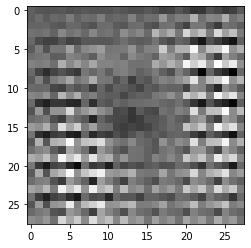

In [23]:
plt.imshow(tf.reshape(model_generator(np.random.randn(1,100)),(28,28)),cmap='Greys')